In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


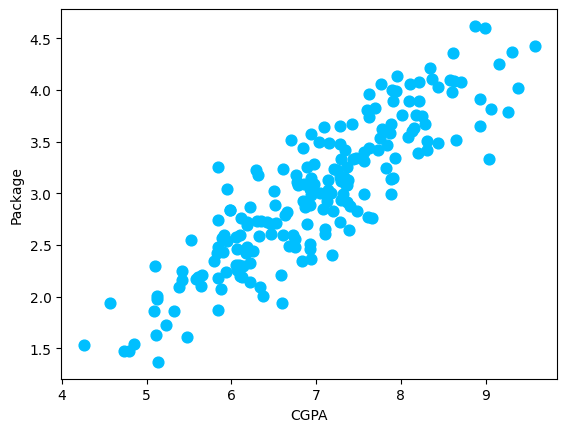

In [4]:
# data points
plt.scatter(df['cgpa'], df['package'], color = 'deepskyblue', s = 60)
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [5]:
# feature(x) and target(y)
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [7]:
# training model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [8]:
lr.predict(x_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

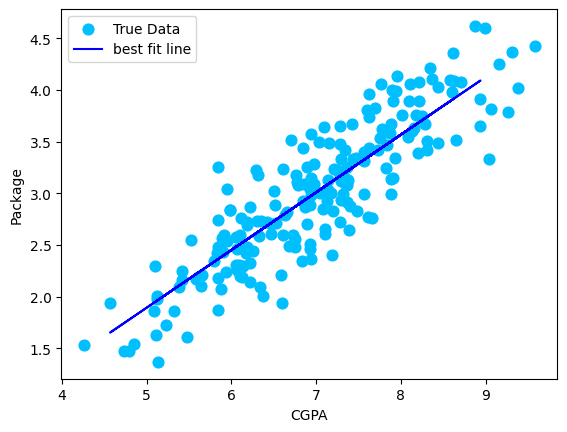

In [10]:
# data points
plt.scatter(df['cgpa'], df['package'], color = 'deepskyblue', s = 60, label = 'True Data')
plt.plot(x_test, lr.predict(x_test), color = 'blue', label = 'best fit line')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()
plt.show()

### MAE

In [12]:
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(y_test, lr.predict(x_test)))

MAE: 0.2884710931878175


### MSE

In [13]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test, lr.predict(x_test)))

MSE: 0.12129235313495527


### RMSE

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))
print('RMSE:',rmse)

RMSE: 0.34827051717731616


### R2 score

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lr.predict(x_test))
print('R2 Score:', r2)

R2 Score: 0.780730147510384


### Adjusted R2 score

R2 adj = 1 - [(1 - r2)*(rows - 1) / (rows - 1 - columns)]

> columns -> input columns

In [25]:
x_test.shape

(40, 1)

In [26]:
rows = x_test.shape[0]
columns = x_test.shape[1]

In [27]:
r2_adj = 1 - (((1 - r2)*(rows - 1)) / (rows - 1 - columns))
print('Adjusted R2 score:',r2_adj)

Adjusted R2 score: 0.7749598882343415
